In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
df = pd.read_csv("raw_data.csv")
df['Date'] = pd.to_datetime(df['Date']) 

print(df.head())


        Date        Close         High          Low         Open  Volume
0 2007-09-17  4494.649902  4549.049805  4482.850098  4518.450195       0
1 2007-09-18  4546.200195  4551.799805  4481.549805  4494.100098       0
2 2007-09-19  4732.350098  4739.000000  4550.250000  4550.250000       0
3 2007-09-20  4747.549805  4760.850098  4721.149902  4734.850098       0
4 2007-09-21  4837.549805  4855.700195  4733.700195  4752.950195       0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4468 entries, 0 to 4467
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4468 non-null   datetime64[ns]
 1   Close   4468 non-null   float64       
 2   High    4468 non-null   float64       
 3   Low     4468 non-null   float64       
 4   Open    4468 non-null   float64       
 5   Volume  4468 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 209.6 KB


In [16]:
print("Rows:", len(df))
print("Columns:", df.columns.tolist())

df.describe().T

Rows: 4468
Columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']


,count,mean,std,min,25%,50%,75%,max
Close,4468.0,10850.134674,6271.099385,2524.199951,5679.699829,8694.324707,15352.762695,2.621605e+04
High,4468.0,10913.670836,6291.586311,2585.300049,5718.187378,8738.399902,15441.225098,2.632580e+04
Low,4468.0,10783.761398,6249.217620,2252.750000,5636.612671,8637.450195,15288.149902,2.617240e+04
Open,4468.0,10856.286638,6273.219158,2553.600098,5680.712524,8698.500000,15383.887695,2.632580e+04
Volume,4468.0,210825.179051,205678.964941,0.000000,0.000000,188200.000000,292425.000000,1.811000e+06


NIFTY50 Close Price Trend

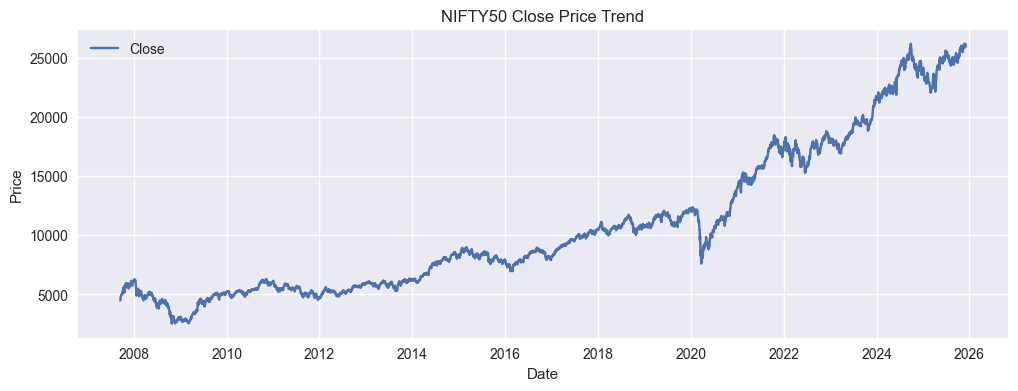

In [35]:
plt.figure(figsize=(12,4))
plt.plot(df["Date"], df["Close"], label="Close")
plt.title("NIFTY50 Close Price Trend")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.show()

**what do we see ?**
* NIFTY50 is  long-term uptrend.
* In COVID time it shows a sharp crash and quick recovery.
* Manytime it shows sideways consolidation.

**Insight :**
* Market predomintly bullish but high volatility exsit.
* Prices follow a long cycles - short-term prediction tough, long-term trend positive. 

Volume Trend :

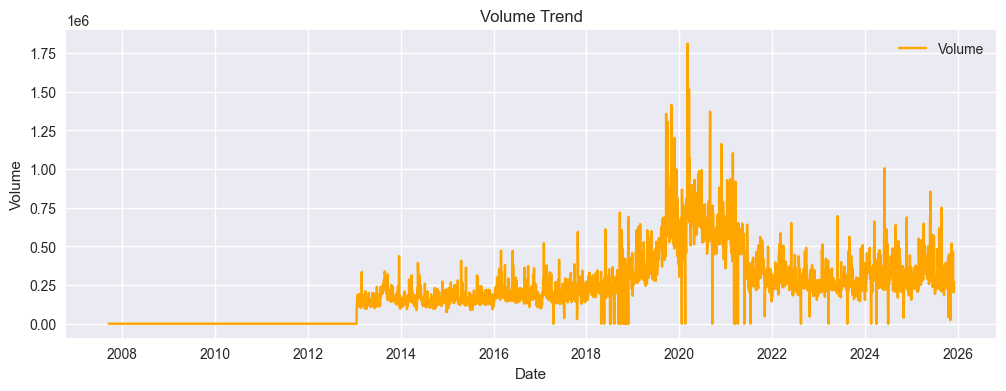

In [38]:
plt.figure(figsize=(12,4))
plt.plot(df["Date"], df["Volume"], color="orange", label="Volume")
plt.title("Volume Trend")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid(True)
plt.legend()
plt.show()

Insight : Volume Spikes Means High Uncertanity or Heavy Trading


Daily Return Calculation :


        Date        Close  daily_return
0 2007-09-17  4494.649902           NaN
1 2007-09-18  4546.200195      0.011469
2 2007-09-19  4732.350098      0.040946
3 2007-09-20  4747.549805      0.003212
4 2007-09-21  4837.549805      0.018957


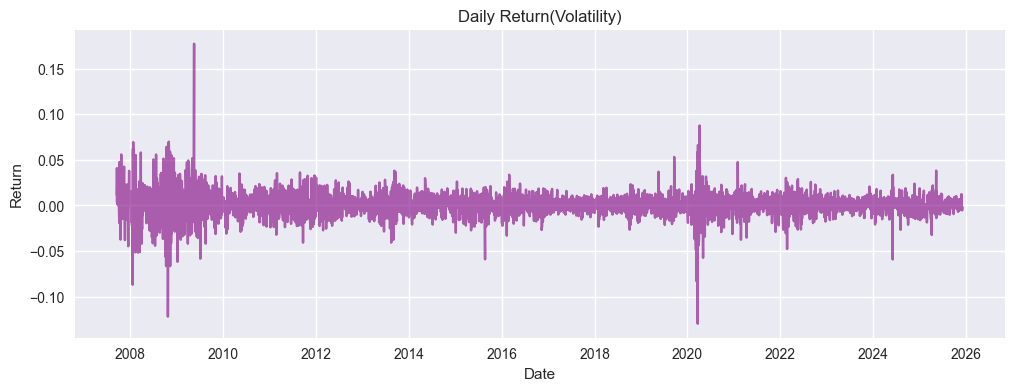

In [ ]:
df["daily_return"] = df["Close"].pct_change()
print(df[["Date", "Close", "daily_return"]].head())

plt.figure(figsize=(12,4))
plt.plot(df['Date'], df['daily_return'], color = 'purple', alpha = 0.6)
plt.title("Daily Return(Volatility)")
plt.xlabel('Date')
plt.ylabel('Return')
plt.grid(True)
plt.show()

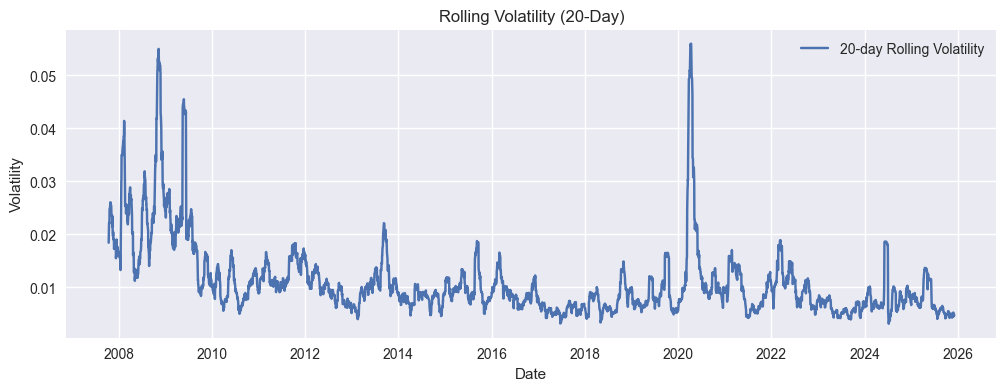

In [7]:
df["rolling_vol"] = df["daily_return"].rolling(20).std()

plt.figure(figsize=(12,4))
plt.plot(df["Date"], df["rolling_vol"], label="20-day Rolling Volatility")
plt.title("Rolling Volatility (20-Day)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.grid(True)
plt.legend()
plt.show()

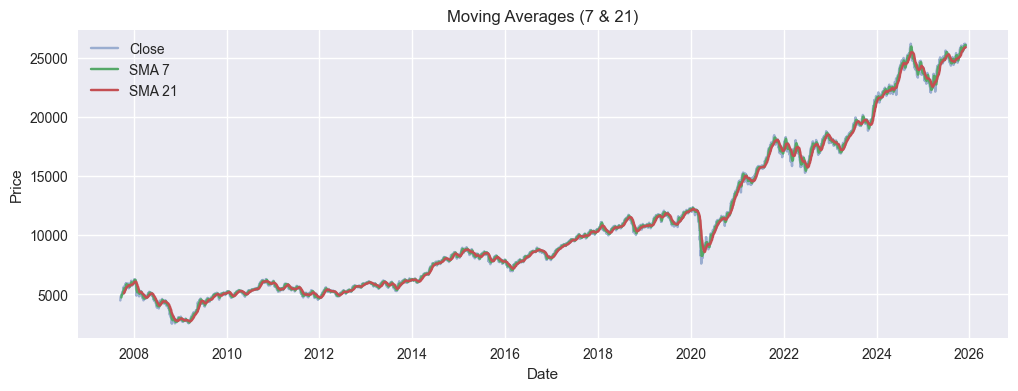

In [8]:
df["SMA_7"] = df["Close"].rolling(7).mean()
df["SMA_21"] = df["Close"].rolling(21).mean()

plt.figure(figsize=(12,4))
plt.plot(df["Date"], df["Close"], label="Close", alpha=0.5)
plt.plot(df["Date"], df["SMA_7"], label="SMA 7")
plt.plot(df["Date"], df["SMA_21"], label="SMA 21")
plt.title("Moving Averages (7 & 21)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.show()